In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_798.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2592.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_318.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_207.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2248.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2733.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2791.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2393.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_106.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_2986.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_707.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_756.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_1199.jpg
/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_1758.jpg
/kaggle/input/alzheimer-mr

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm
import glob
import tensorflow 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.data.experimental import AUTOTUNE
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import RandomRotation, RandomZoom
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import applications
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, AUC,Recall
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
import copy
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.vgg19 import VGG19,preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
!pip install visualkeras
!pip install ann_visualizer
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 32.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4169 sha256=bf428d8454565a27c73502ee7d53a9fcbbfe21ed877706944953c7782dc234ea
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [4]:
!pip install git+https://github.com/jfilter/split-folders.git

  Cloning https://github.com/jfilter/split-folders.git to /tmp/pip-req-build-1khou0cn
  Running command git clone --filter=blob:none --quiet https://github.com/jfilter/split-folders.git /tmp/pip-req-build-1khou0cn
  Resolved https://github.com/jfilter/split-folders.git to commit c566dbd56a1097e1ddba2de5dfb93bd67eade54f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for split-folders: filename=split_folders-0.5.1-py3-none-any.whl size=8394 sha256=c446c34418b9a2f848aec039aa6df18c12274b0c3582f3996c6f5321d20d8df0
  Stored in directory: /tmp/pip-ephem-wheel-cache-htgl03hs/wheels/0c/da/06/fcebe493adfe604ee9a1d4511e3932a6e63a044edb7a10dec8
Successfully built split-folders


In [5]:
#Splitting into train,validation,test folders
import splitfolders

input_folder='/kaggle/input/alzheimer-mri-dataset/Dataset'

output_folder='/kaggle/working/Splitted'

train_ratio=0.8
validation_ratio=0.1
test_ratio=0.1
splitfolders.ratio(input_folder, output_folder, seed=42,
                   ratio=(train_ratio,
                          validation_ratio,
                          test_ratio))

Copying files: 6400 files [00:31, 203.17 files/s]


In [6]:
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE=16
IMG_SIZE=(128,128)
SEED=1345

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0,
                                zoom_range=0.2)

validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)


#Defining directories for train,validation,test 
train_dir = '/kaggle/working/Splitted/train'
validation_dir = '/kaggle/working/Splitted/val'
test_dir = '/kaggle/working/Splitted/test'


#Defining generatores for train,validation,test

train_generator=train_datagen.flow_from_directory(
    train_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size=64,
        class_mode ='categorical',
)

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        seed = SEED,
        shuffle=True,
        batch_size=64,
        class_mode ='categorical',)

# Define generator for test set using flow_from_directory
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size =64,
        class_mode ='categorical',
)


Found 5119 images belonging to 4 classes.
Found 639 images belonging to 4 classes.
Found 642 images belonging to 4 classes.


In [7]:
class_names=list(train_generator.class_indices.keys())
print(class_names)

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


# Visualizing images of different classes

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


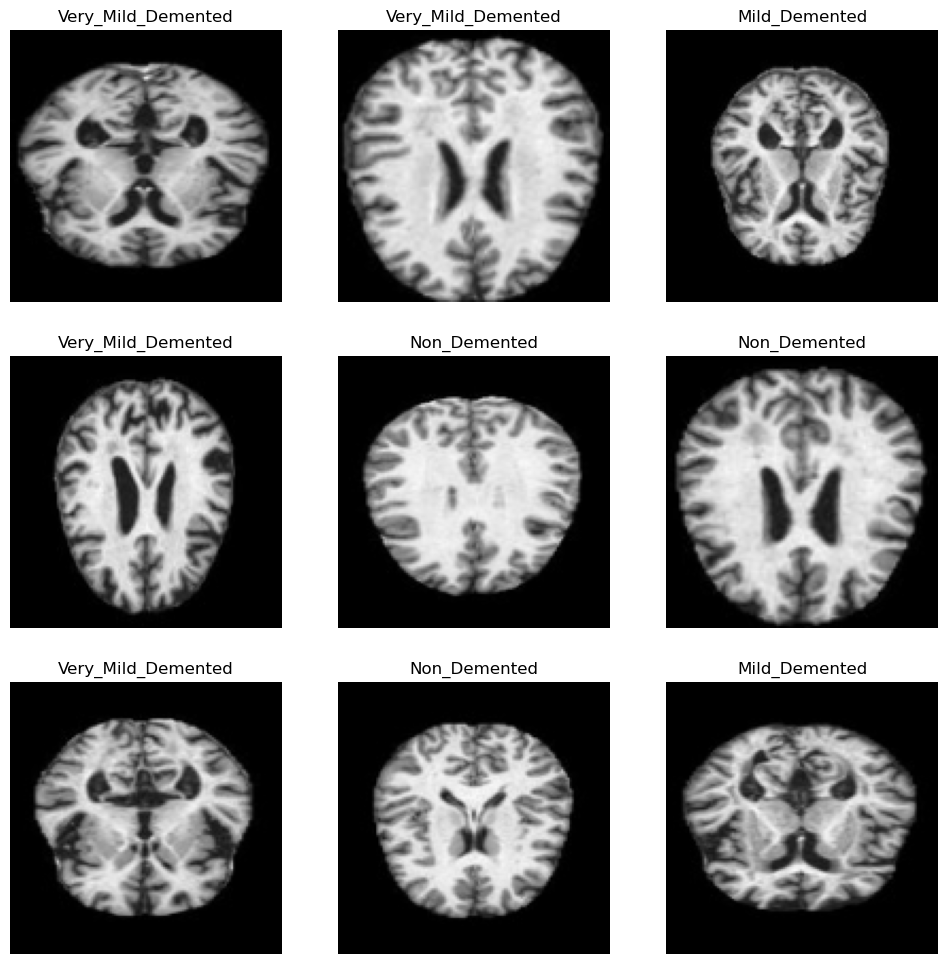

In [8]:
#Visualizing images of different classes
plt.figure(figsize=(12,12))

for images,labels in train_generator:
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        print(images[i].shape)
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    break

# Moving towards Data Augmentation


In [9]:
#Augmentation with ZOOM and ROTATION
def data_augmentar():
    data_augmentation = Sequential()
    data_augmentation.add(RandomRotation(factor=(-0.15, 0.15)))
    data_augmentation.add(RandomZoom((-0.3, -0.1)))
    return data_augmentation

In [10]:
data_augmentation = data_augmentar()
assert(data_augmentation.layers[0].name.startswith('random_rotation'))
assert(data_augmentation.layers[0].factor == (-0.15, 0.15))
assert(data_augmentation.layers[1].name.startswith('random_zoom'))
assert(data_augmentation.layers[1].height_factor == (-0.3, -0.1))

# Visualzing Imbalance

## Non Demented is dominant class

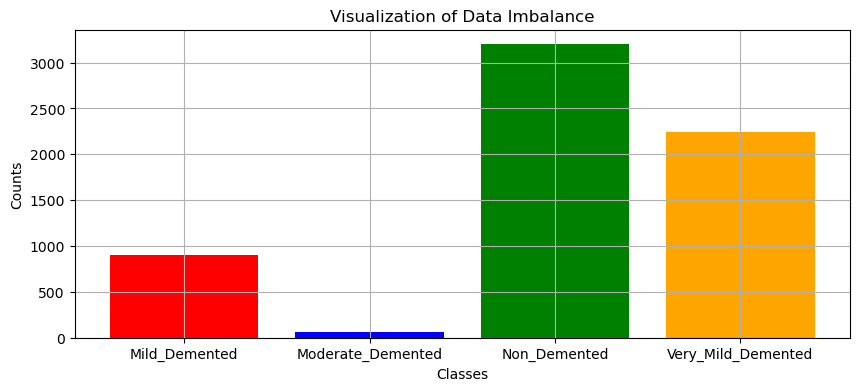

In [11]:
input_folder='/kaggle/input/alzheimer-mri-dataset/Dataset'

class_count=dict()

for i in class_names:
    class_count[i]=len(os.listdir(input_folder+'/'+i))

plt.figure(figsize=(10,4))
colors = ['red', 'blue', 'green', 'orange']
plt.bar(class_count.keys(),class_count.values(),color=colors)

plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Visualization of Data Imbalance')
plt.grid(True)
plt.show()

In [12]:
total_samples=sum(class_count.values())

for i in range(4):
    class_weight = round(total_samples / (4 * list(class_count.values())[i]), 2)
    print(f'Weight for class \"{class_names[i]}\" : {class_weight}')

Weight for class "Mild_Demented" : 1.79
Weight for class "Moderate_Demented" : 25.0
Weight for class "Non_Demented" : 0.5
Weight for class "Very_Mild_Demented" : 0.71


# Model Creation

In [13]:
filepath = './Vgg_best_weights.hdf5'
earlystopping=EarlyStopping(monitor='val_accuracy',
                           mode='max',
                           patience=15,
                           verbose=1)

checkpoint=ModelCheckpoint(filepath,monitor = 'val_accuracy', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)

callback_list=[earlystopping,checkpoint]

# VGG19

In [14]:
input_shape = (128,128, 3)

#Create an instance of the VGG16 model
vgg16 = VGG16(include_top=False, input_shape=input_shape,
                   weights='imagenet')

# Freeze the layers of the VGG16 model
for layer in vgg16.layers:
    layer.trainable = False
    
# Create a new model with additional layers
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

prediction_layer = keras.layers.Dense(4,activation='softmax')

model = tf.keras.Sequential([vgg16, global_average_layer,
  keras.layers.BatchNormalization(),  
  keras.layers.Dense(2048, activation='relu'),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  prediction_layer
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.AUC(),
                        tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),])


58889256/58889256 [==============================] - 2s 0us/step


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 2048)              1050624   
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 256)              

# Model Architecture

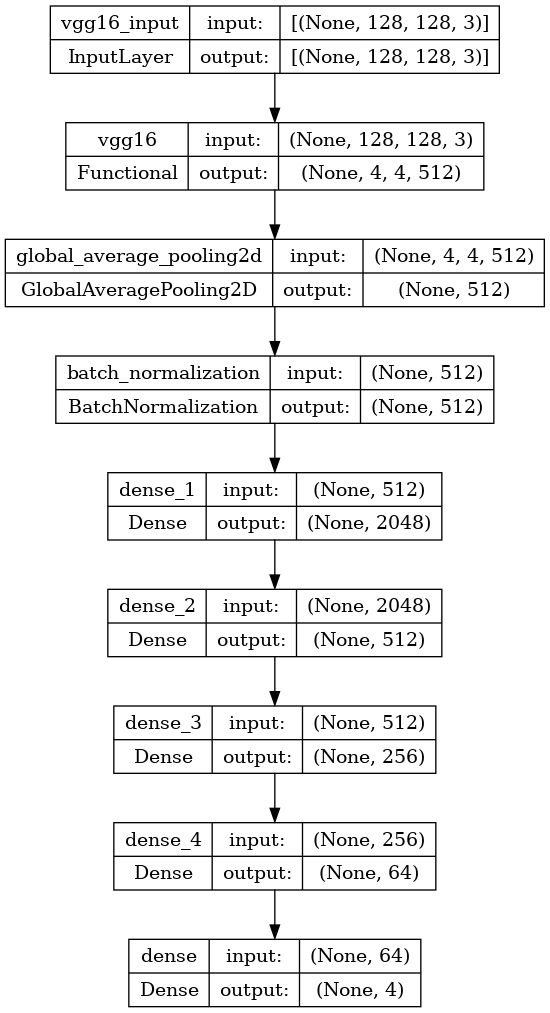

In [16]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='modelVGG16_plot.png', show_shapes=True, show_layer_names=True)


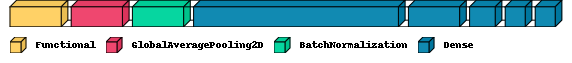

In [17]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model, legend=True)

In [18]:
history=model.fit(train_generator,
                        validation_data=validation_generator,
                        steps_per_epoch=len(train_generator),
                        epochs = 20,
                        verbose = 1)

Epoch 1/20
80/80 [==============================] - 34s 295ms/step - loss: 0.9399 - accuracy: 0.5468 - auc: 0.8327 - precision: 0.6361 - recall: 0.4018 - val_loss: 0.9921 - val_accuracy: 0.5008 - val_auc: 0.8271 - val_precision: 0.5426 - val_recall: 0.4789
Epoch 2/20
80/80 [==============================] - 21s 267ms/step - loss: 0.7743 - accuracy: 0.6501 - auc: 0.8893 - precision: 0.7072 - recall: 0.5521 - val_loss: 0.9901 - val_accuracy: 0.5023 - val_auc: 0.8347 - val_precision: 0.5327 - val_recall: 0.4977
Epoch 3/20
80/80 [==============================] - 22s 274ms/step - loss: 0.6980 - accuracy: 0.6951 - auc: 0.9110 - precision: 0.7416 - recall: 0.6230 - val_loss: 0.8843 - val_accuracy: 0.6119 - val_auc: 0.8684 - val_precision: 0.6886 - val_recall: 0.3772
Epoch 4/20
80/80 [==============================] - 22s 275ms/step - loss: 0.6220 - accuracy: 0.7357 - auc: 0.9302 - precision: 0.7648 - recall: 0.6818 - val_loss: 0.7639 - val_accuracy: 0.7293 - val_auc: 0.9202 - val_precision: 

In [19]:
#Train Loss,Accuracy,AUC,Precision,Recall
result = model.evaluate(train_generator)
train_loss = result[0]
train_accuracy = result[1]
train_AUC = result[2]
train_pre = result[3]
train_rec = result[4]
print(f'Train Loss = {train_loss}')
print(f'Train Accuracy = {train_accuracy}')
print(f'Train AUC = {train_AUC}')
print(f'Train Precision = {train_pre}')
print(f'Train Recall = {train_rec}')

80/80 [==============================] - 22s 278ms/step - loss: 0.1271 - accuracy: 0.9516 - auc: 0.9968 - precision: 0.9541 - recall: 0.9492
Train Loss = 0.12705276906490326
Train Accuracy = 0.9515530467033386
Train AUC = 0.9967940449714661
Train Precision = 0.954054594039917
Train Recall = 0.9492088556289673


In [20]:
#Test Loss,Accuracy,AUC,Precision,Recall
result = model.evaluate(test_generator)
test_loss = result[0]
test_accuracy = result[1]
test_AUC = result[2]
test_pre = result[3]
test_rec = result[4]
print(f'Test Loss = {test_loss}')
print(f'Test Accuracy = {test_accuracy}')
print(f'Test AUC = {test_AUC}')
print(f'Test Precision = {test_pre}')
print(f'Test Recall = {test_rec}')

11/11 [==============================] - 1s 75ms/step - loss: 0.1934 - accuracy: 0.9268 - auc: 0.9928 - precision: 0.9280 - recall: 0.9237
Test Loss = 0.19338423013687134
Test Accuracy = 0.926791250705719
Test AUC = 0.9927954077720642
Test Precision = 0.928012490272522
Test Recall = 0.9236760139465332


# Visualizing Loss,Accuracy,AUC,Precision,Recall-VGG16

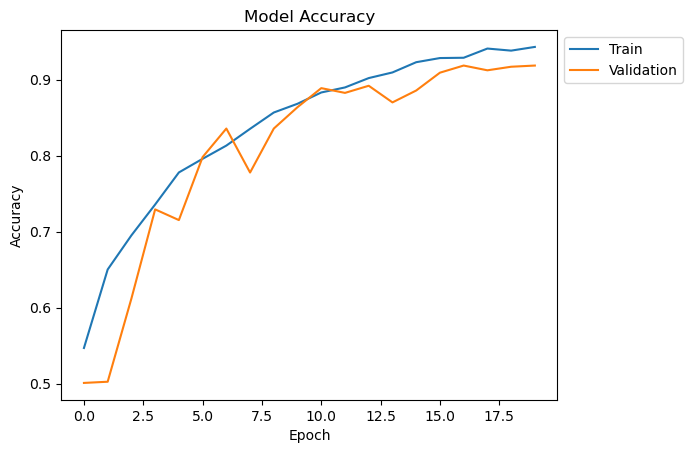

In [21]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy - ' + str(format(result[1], "0.2f")))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

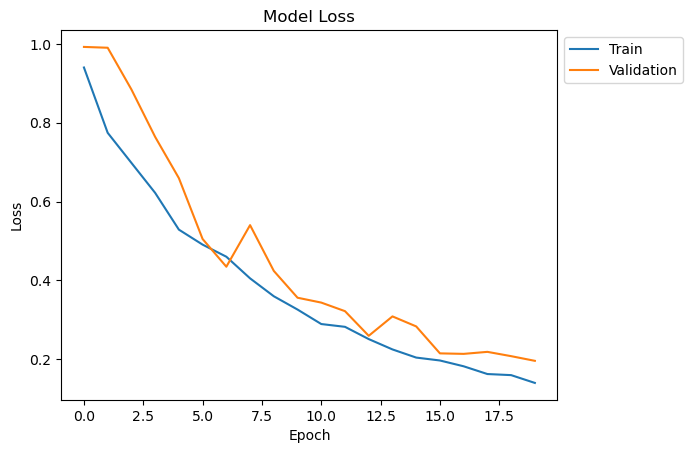

In [22]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


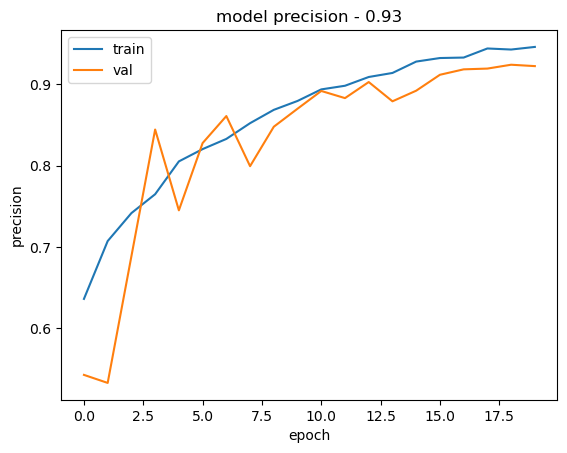

In [34]:
#Precision
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision - ' + str(format(result[3], "0.2f")))
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

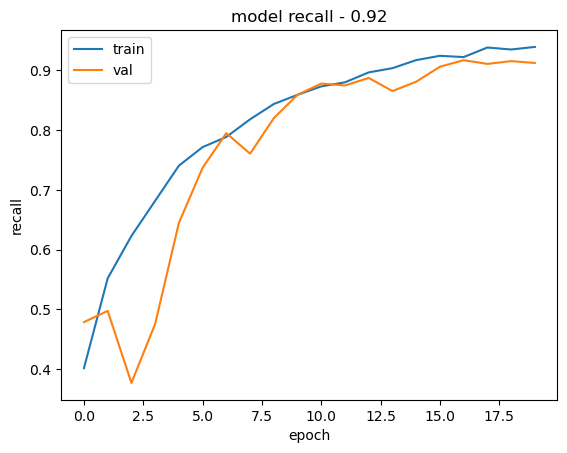

In [35]:
#Recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall - ' + str(format(result[4], "0.2f")))
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

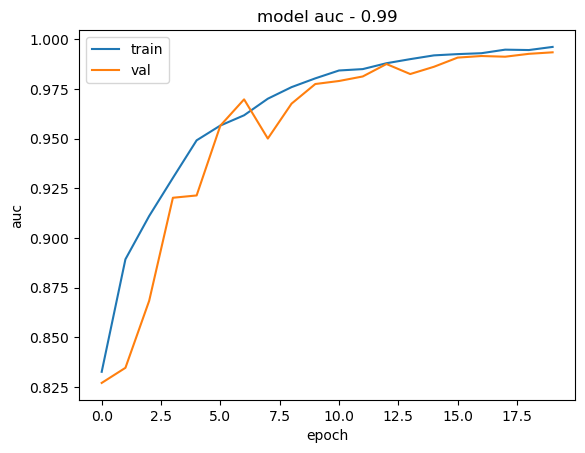

In [36]:
# AUC
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc - ' + str(format(result[2], "0.2f")))
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [37]:
test_label=test_generator.classes

In [38]:
Y_pred=model.predict(test_generator)

11/11 [==============================] - 1s 50ms/step


In [45]:
y_pred=[]
[y_pred.append(np.argmax(l)) for l in Y_pred ]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [46]:
y_pred=np.array(y_pred)
y_pred.shape

(642,)

# Confusion Matrix-VGG16

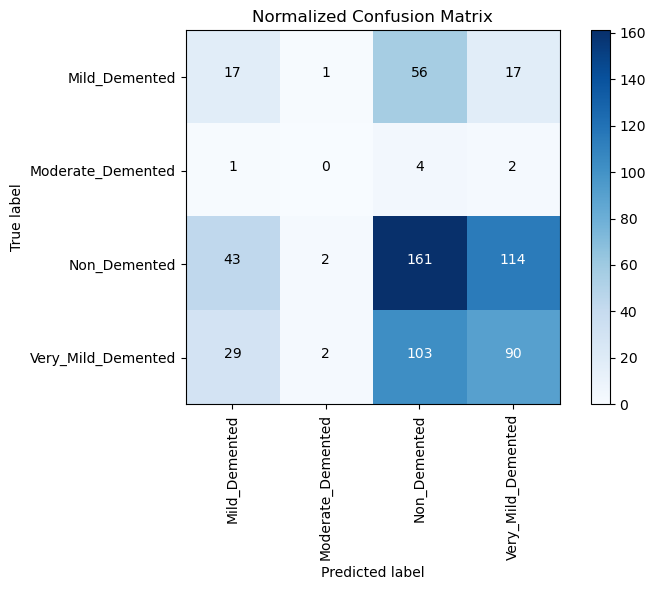

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized Confusion Matrix"
    else:
        title = "Confusion Matrix"

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
#     '.2f' if normalize else 
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(test_label, y_pred)

class_names

plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, class_names, normalize=True)
plt.show()


# Classification Report-VGG16

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute the classification report
report = classification_report(test_label, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.19      0.19        91
           1       0.00      0.00      0.00         7
           2       0.50      0.50      0.50       320
           3       0.40      0.40      0.40       224

    accuracy                           0.42       642
   macro avg       0.27      0.27      0.27       642
weighted avg       0.42      0.42      0.42       642



# VGG-19

In [50]:
from tensorflow.keras.applications.vgg19 import VGG19
input_shape = (128,128, 3)

#Create an instance of the VGG16 model
vgg19 = VGG19(include_top=False, input_shape=input_shape,
                   weights='imagenet')

# Freeze the layers of the VGG16 model
for layer in vgg19.layers:
    layer.trainable = False
    

    
# Create a new model with additional layers
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

prediction_layer = keras.layers.Dense(4,activation='softmax')

model2 = tf.keras.Sequential([vgg19, global_average_layer,
  keras.layers.BatchNormalization(),  
  keras.layers.Dense(2048, activation='relu'),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  prediction_layer
])



model2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.AUC(),
                        tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),])



In [51]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 2048)              1050624   
                                                                 
 dense_12 (Dense)            (None, 512)               1049088   
                                                                 
 dense_13 (Dense)            (None, 256)              

# Model Architecture

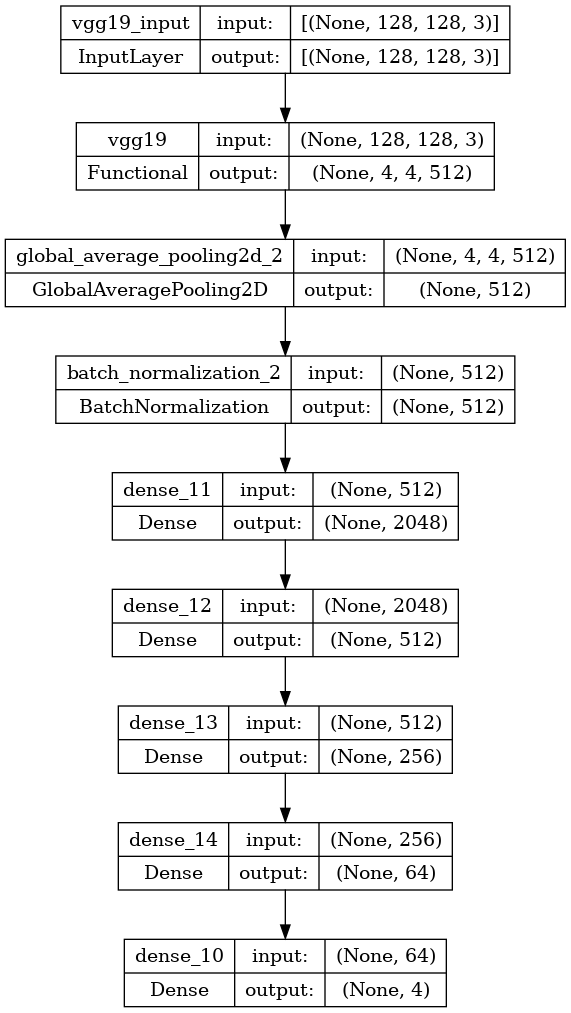

In [52]:
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='modelVGG19_plot.png', show_shapes=True, show_layer_names=True)


In [53]:
history2=model2.fit(train_generator,
                        validation_data=validation_generator,
                        steps_per_epoch=len(train_generator),
                        epochs = 20,
                        verbose = 1)

Epoch 1/20
80/80 [==============================] - 26s 286ms/step - loss: 0.9430 - accuracy: 0.5429 - auc_2: 0.8297 - precision_2: 0.6216 - recall_2: 0.3770 - val_loss: 1.0454 - val_accuracy: 0.5790 - val_auc_2: 0.8146 - val_precision_2: 1.0000 - val_recall_2: 0.0047
Epoch 2/20
80/80 [==============================] - 22s 274ms/step - loss: 0.8288 - accuracy: 0.6189 - auc_2: 0.8710 - precision_2: 0.6874 - recall_2: 0.4901 - val_loss: 0.9629 - val_accuracy: 0.5712 - val_auc_2: 0.8491 - val_precision_2: 0.8125 - val_recall_2: 0.2645
Epoch 3/20
80/80 [==============================] - 23s 286ms/step - loss: 0.7385 - accuracy: 0.6618 - auc_2: 0.8989 - precision_2: 0.7225 - recall_2: 0.5722 - val_loss: 0.8498 - val_accuracy: 0.6197 - val_auc_2: 0.8761 - val_precision_2: 0.7230 - val_recall_2: 0.4085
Epoch 4/20
80/80 [==============================] - 21s 266ms/step - loss: 0.6842 - accuracy: 0.6980 - auc_2: 0.9130 - precision_2: 0.7434 - recall_2: 0.6265 - val_loss: 0.7834 - val_accuracy: 

In [54]:
#Train Loss,Accuracy,AUC,Precision,Recall
result = model2.evaluate(train_generator)
train_loss = result[0]
train_accuracy = result[1]
train_AUC = result[2]
train_pre = result[3]
train_rec = result[4]
print(f'Train Loss = {train_loss}')
print(f'Train Accuracy = {train_accuracy}')
print(f'Train AUC = {train_AUC}')
print(f'Train Precision = {train_pre}')
print(f'Train Recall = {train_rec}')

80/80 [==============================] - 21s 259ms/step - loss: 0.1583 - accuracy: 0.9414 - auc_2: 0.9949 - precision_2: 0.9451 - recall_2: 0.9355
Train Loss = 0.1582845151424408
Train Accuracy = 0.9413948059082031
Train AUC = 0.9948588013648987
Train Precision = 0.9451351761817932
Train Recall = 0.9355342984199524


In [55]:
#Test Loss,Accuracy,AUC,Precision,Recall
result = model2.evaluate(test_generator)
test_loss = result[0]
test_accuracy = result[1]
test_AUC = result[2]
test_pre = result[3]
test_rec = result[4]
print(f'Test Loss = {test_loss}')
print(f'Test Accuracy = {test_accuracy}')
print(f'Test AUC = {test_AUC}')
print(f'Test Precision = {test_pre}')
print(f'Test Recall = {test_rec}')

11/11 [==============================] - 1s 57ms/step - loss: 0.2789 - accuracy: 0.8972 - auc_2: 0.9861 - precision_2: 0.8980 - recall_2: 0.8910
Test Loss = 0.2789330780506134
Test Accuracy = 0.8971962332725525
Test AUC = 0.9861191511154175
Test Precision = 0.8979591727256775
Test Recall = 0.8909657597541809


# Visualizing Loss,Accuracy,AUC,Precision,Recall-VGG19

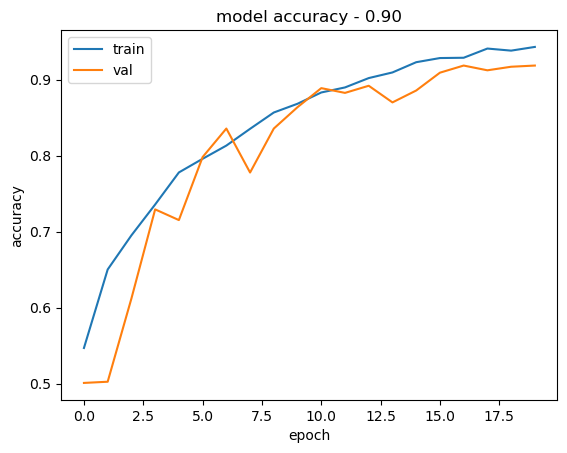

In [56]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy - ' + str(format(result[1], "0.2f")))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

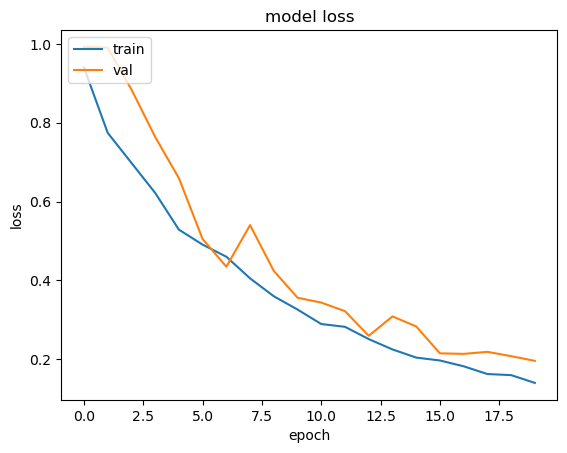

In [67]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

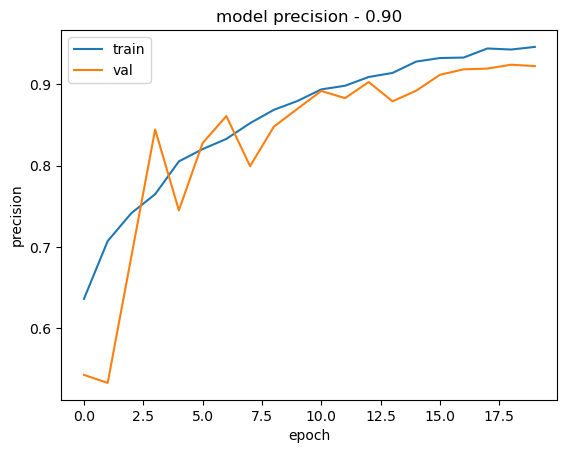

In [68]:
#Precision
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision - ' + str(format(result[3], "0.2f")))
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

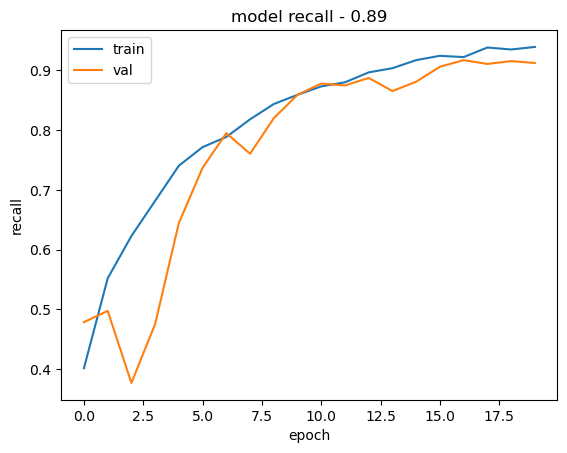

In [69]:
#Recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall - ' + str(format(result[4], "0.2f")))
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


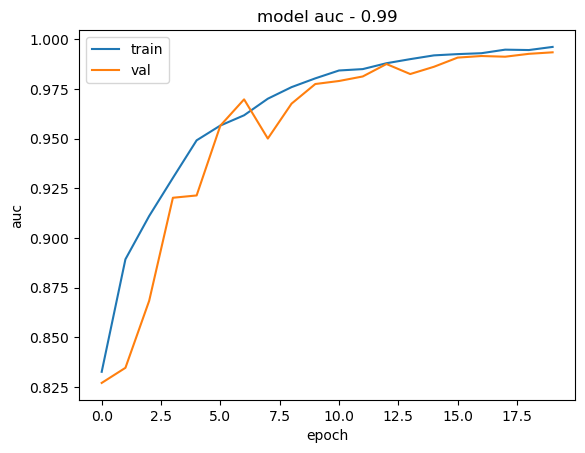

In [70]:
# AUC
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc - ' + str(format(result[2], "0.2f")))
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [59]:
Y_pred=model2.predict(test_generator)

11/11 [==============================] - 1s 55ms/step


In [60]:
y_pred=[]
[y_pred.append(np.argmax(l)) for l in Y_pred ]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [61]:
y_pred=np.array(y_pred)
y_pred.shape

(642,)

# Confusion Matrix-VGG19

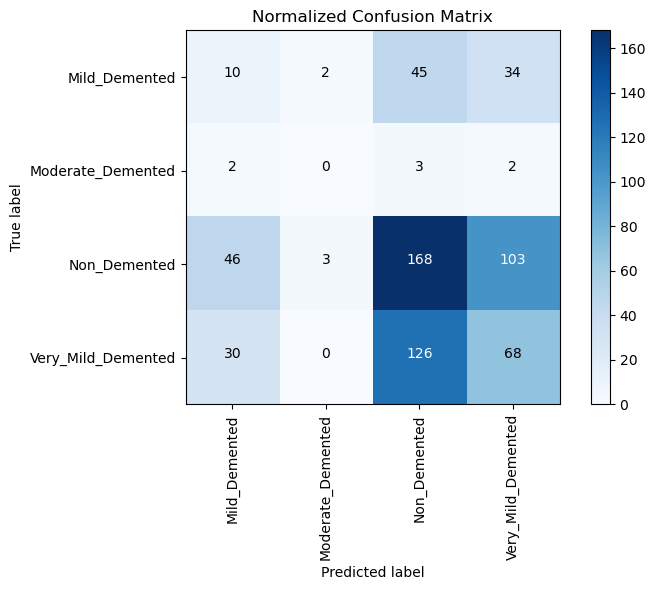

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized Confusion Matrix"
    else:
        title = "Confusion Matrix"

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
#     '.2f' if normalize else 
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(test_label, y_pred)

class_names

plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, class_names, normalize=True)
plt.show()


# Classification Report-VGG19

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute the classification report
report = classification_report(test_label, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.11      0.11        91
           1       0.00      0.00      0.00         7
           2       0.49      0.53      0.51       320
           3       0.33      0.30      0.32       224

    accuracy                           0.38       642
   macro avg       0.23      0.23      0.23       642
weighted avg       0.38      0.38      0.38       642



In [64]:
import pickle
pickle.dump(model, open('VGG16', 'wb'))
pickle.dump(model2, open('VGG19', 'wb'))